In [14]:
library(ggplot2)
library(dplyr)
library(tidyr)

In [15]:
data <- read.csv("../data/scenarios.csv", sep = ";")
data

Genome,d,Scenarios,Intermediates
<chr>,<int>,<chr>,<chr>
Chimpanzee,27,6.54 * 10^{11},2.46 * 10^{4}
Orangutan,53,6.03 * 10^{38},1.29 * 10^{10}
Rhesus,150,1.21 * 10^{138},1.45 * 10^{28}
Marmoset,204,3.99 * 10^{250},3.13 * 10^{43}
Horse,225,1.63 * 10^{135},1.31 * 10^{51}
Dog,304,"[10^{432},10^{471}]",6.37 * 10^{70}
Pig,318,"[10^{463},10^{479}]",1.61 * 10^{73}
White rhino,328,"[10^{546},10^{588}]",1.36 * 10^{84}
Elephant,336,"[10^{583},10^{609}]",8.56 * 10^{86}


In [16]:
num_to_log10scale <- function (x) {
    parts <- strsplit(x, split = " ")[[1]]
    x <- as.numeric(parts[1])
    # assumes that the 2nd factor is 10 to some power
    y <- as.numeric(substr(parts[3], 5, nchar(parts[3]) - 1))
    log10(x) + y
}

interval_to_log10scale <- function(x) {
    # assumes that x is 10 to some power; the function just extracts the exponent
    # exponent must be between { }
    extremes <- strsplit(substr(x, 2, nchar(x) - 1), split = ",")[[1]]
    start <- as.numeric(gsub("^.*\\{(\\d+)\\}$", "\\1", extremes[1]))
    end <- as.numeric(gsub("^.*\\{(\\d+)\\}$", "\\1", extremes[2]))
    paste("[", start, ",", end, "]", sep = "")
}

In [17]:
data["Intermediates"] <- apply(data["Intermediates"], 1, num_to_log10scale)
data[1:5,]["Scenarios"] <- apply(data[1:5,]["Scenarios"], 1, num_to_log10scale)
data[6:nrow(data),]["Scenarios"] <- apply(data[6:nrow(data),]["Scenarios"], 1, interval_to_log10scale)

In [51]:
# Convert the range values in column "y" to separate minimum and maximum columns
data$scen_min <- as.numeric(gsub("\\[(\\d+),.+", "\\1", data$Scenarios))
data$scen_max <- as.numeric(gsub("\\[.+,(\\d+)]", "\\1", data$Scenarios))

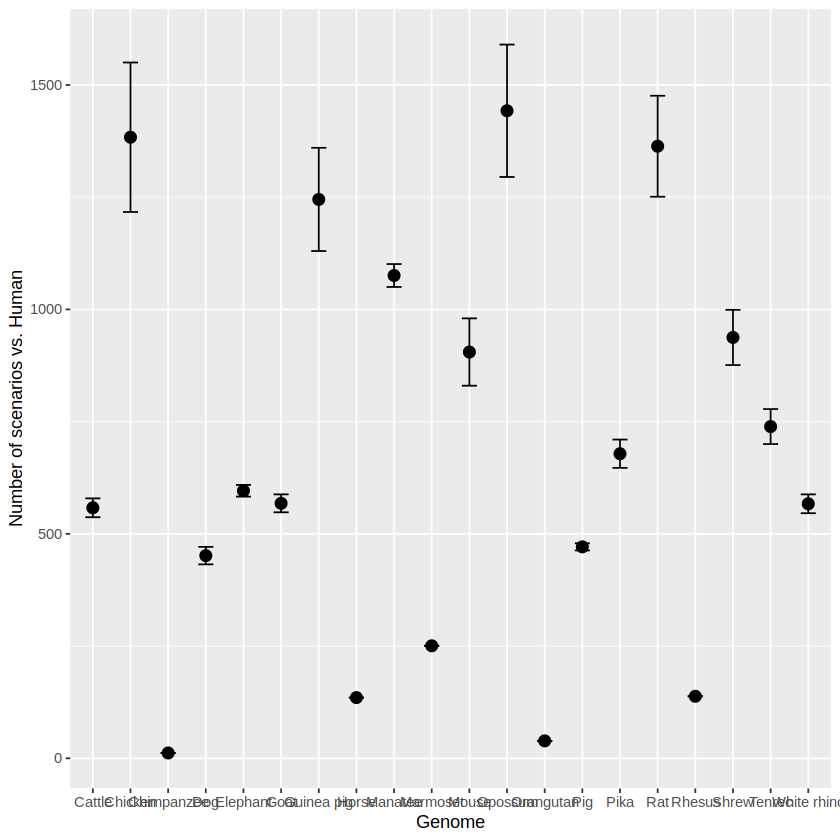

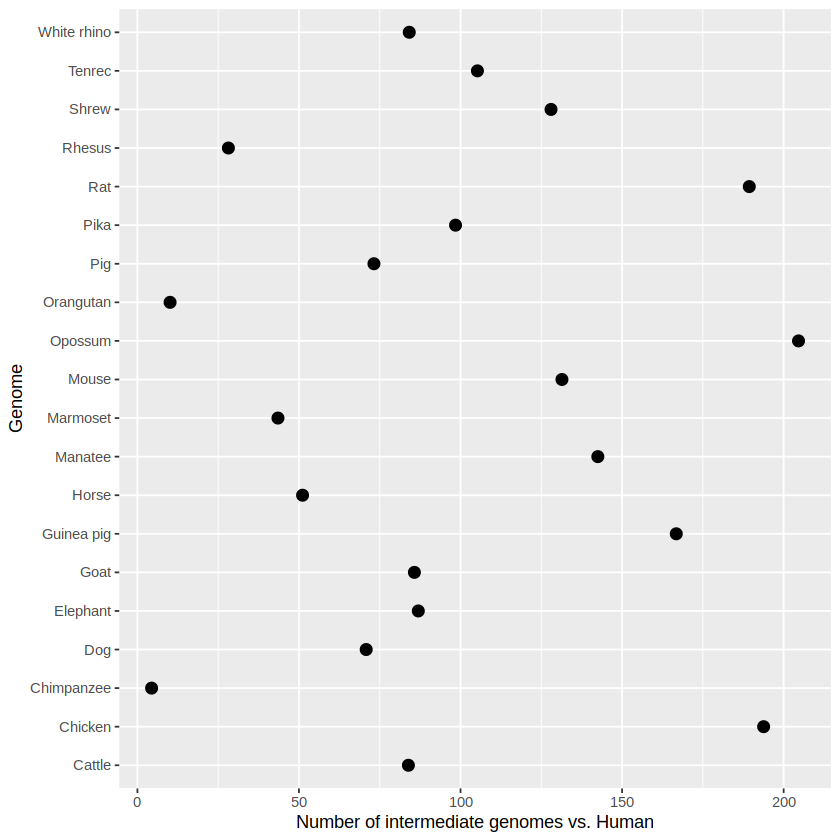

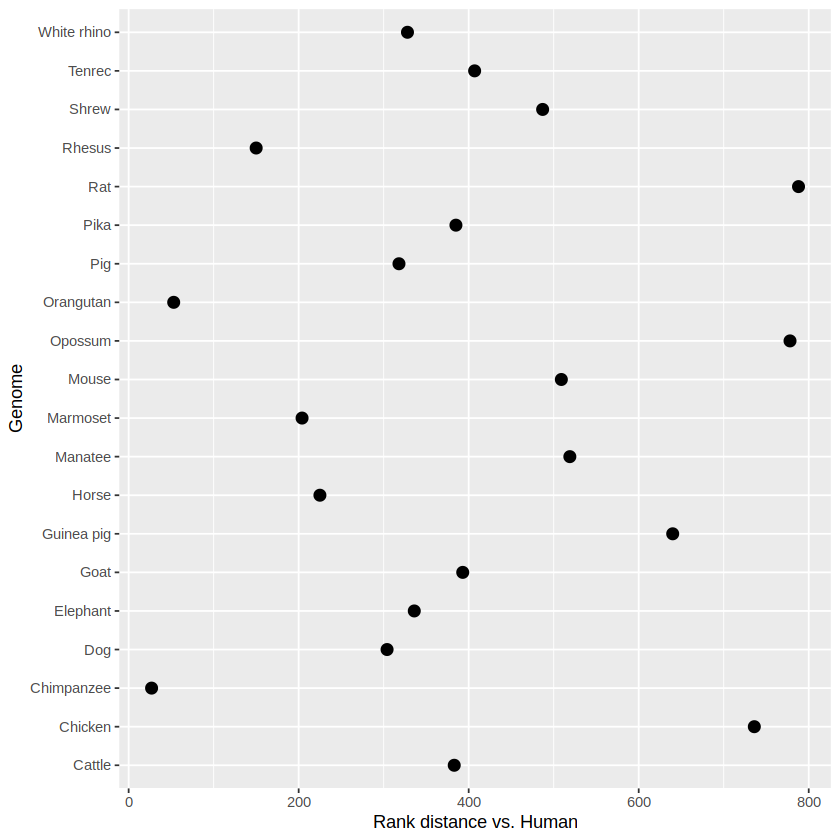

In [61]:
ggplot(data, aes(x = Genome, y = (scen_min + scen_max) / 2)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = scen_min, ymax = scen_max), width = 0.4) +
  labs(x = "Genome",
       y = "Number of scenarios vs. Human")

ggplot(data, aes(x = Intermediates, y = Genome)) +
  geom_point(size = 3) +
  labs(x = "Number of intermediate genomes vs. Human",
       y = "Genome")

ggplot(data, aes(x = d, y = Genome)) +
  geom_point(size = 3) +
  labs(x = "Rank distance vs. Human",
       y = "Genome")